In [83]:
!pip install -U scikit-learn

In [84]:
from sklearn.datasets import load_iris
#from sklearn import tree
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

#from sklearn import linear_model
#from sklearn.metrics import mean_squared_error, r2_score

1.

In [85]:
df = load_iris(as_frame=True).frame
# as_frame=True преобразует данные в виде dataframe

In [86]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [87]:
df.info() # пропусков не обнаружено

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [88]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [89]:
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

2.

In [90]:
df['target_virginica'] = 1 * (df['target'] == 2)
# 0, если цветок не является классом 2, иначе — 1

In [91]:
df['target_virginica'].value_counts()

target_virginica
0    100
1     50
Name: count, dtype: int64

In [103]:
for t in df['target_virginica'].unique():
    print(f'==Class {t}==')
    display(df.query(f'target_virginica == {t}').describe().loc[['min', 'mean', 'max'], :])

==Class 0==


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_virginica
min,4.300,2.000,1.000,0.100,0.0,0.0
mean,5.471,3.099,2.861,0.786,0.5,0.0
max,7.000,4.400,5.100,1.800,1.0,0.0


==Class 1==


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_virginica
min,4.900,2.200,4.500,1.400,2.0,1.0
mean,6.588,2.974,5.552,2.026,2.0,1.0
max,7.900,3.800,6.900,2.500,2.0,1.0


Разметка выполнена корректно

In [93]:
# разделение данных на обучающую и тестовую выборки
features_train, features_test, target_train, target_test = train_test_split(df.drop(['target', 'target_virginica'], axis=1), df['target_virginica'], test_size=0.3, random_state=42)

In [94]:
features_train.shape, target_train.shape

((105, 4), (105,))

In [95]:
features_test.shape, target_test.shape

((45, 4), (45,))

3.

In [96]:
model = LogisticRegression(random_state=42)
model.fit(features_train, target_train)
# обучение модели логистической регрессии на обучающей части данных

LogisticRegression(random_state=42)

4.

In [97]:
# Оценка точности. Сравнение метрик прогнозов на тестовой выборке и на обучающей
predictions_val = model.predict(features_test)
print("Accuracy test built-in:", accuracy_score(target_test, predictions_val))
predictions_train = model.predict(features_train)
print("Accuracy train built-in: %.3f"% accuracy_score(target_train, predictions_train))

Accuracy test built-in: 1.0
Accuracy train built-in: 0.962


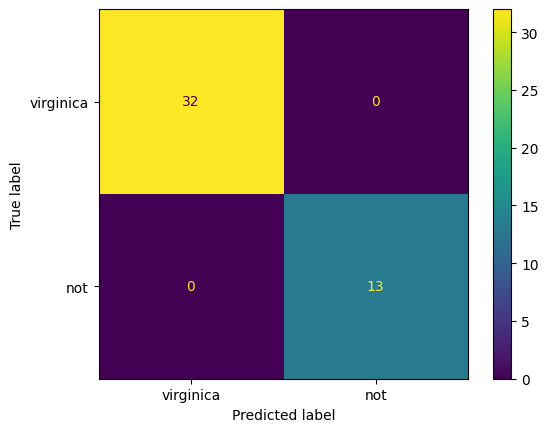

In [98]:
ConfusionMatrixDisplay(confusion_matrix(target_test, predictions_val), display_labels=['virginica', 'not']).plot()
# визуализация матрицы ошибок

Ошибок в предсказании нет. Предсказания тест выб выше трен, значит переобучения не возникло

5...

In [99]:
class MyLogisticRegression:
    def __init__(self, step_size, iterations):
        self.step_size = step_size
        self.iterations = iterations

    def fit(self, features_train, target_train):
        X = features_train # по умолчанию fit_intercept=True (смещение)
        # поэтому нет необходимости в добавлении столбца единиц для учета bias
        y = target_train
        w = np.zeros(X.shape[1])
        
        for i in range(self.iterations):
            z = X @ w  #значение признака эл. на вес лог. рег.
            #применение функции сигмоида 
            # для получения числа из отрезка от 0 до 1
            sigm_z_pred = 1 / (1 + np.exp(-z))
            #расчет градиента
            gradient = (X.T @ (sigm_z_pred - y)) / X.shape[0]
            w -= self.step_size * gradient
        self.w = w
        
    def predict(self, features_test):
        z = features_test @ self.w
        sigm_z_pred = 1 / (1 + np.exp(-z))
        # возвращение лейблов 0/1 исходя из вероятности
        y = np.where(sigm_z_pred > 0.5, 1, 0)
        return y

In [100]:
model_1 = MyLogisticRegression(step_size= 0.08, iterations = 250)
model_1.fit(features_train, target_train)
predictions_val_mlr = model_1.predict(features_test)

In [101]:
predictions_train = model_1.predict(features_train)
print("Accuracy train built-in: %.3f"% accuracy_score(target_train, predictions_train))
predictions_val = model_1.predict(features_test)
print("Accuracy test built-in:", accuracy_score(target_test, predictions_val))

Accuracy train built-in: 0.962
Accuracy test built-in: 1.0


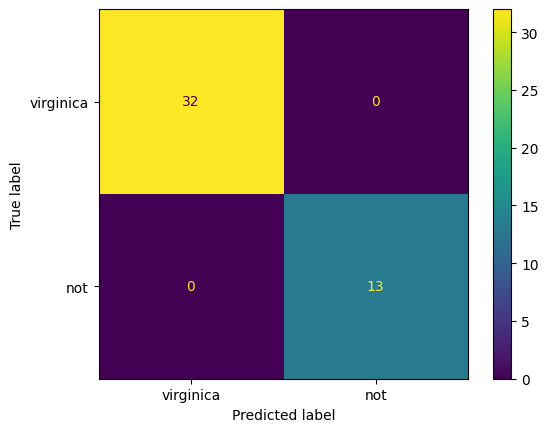

In [102]:
ConfusionMatrixDisplay(confusion_matrix(target_test, predictions_val_mlr), display_labels=['virginica', 'not']).plot()

Параметры градиентного спуска (количество интераций, размер шага) подобраны оптимально. Модель работает безошибочно